In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
data = loadmat('maze_linear_system.mat')
A = data['A']
b = data['b']
A=A.toarray()
b=b.flatten()
n=A.shape[0] 
iter_max=500

In [3]:
# no preconditioning 
x=np.random.rand(n)
r=A@x - b
R_FroNorm = np.zeros(iter_max)
p=-r
for i in range(iter_max):
    alpha = np.dot(r, r) / (np.dot(p, A@p))# + 1e-12)
    x = x + alpha * p
    r_dot_old=np.dot(r, r)
    r = A@x - b

    beta = np.dot(r, r) / (r_dot_old)#+ 1e-12)
    p = -r + beta * p
    R_FroNorm[i] = np.linalg.norm(r)
print("residual: ", R_FroNorm[:10])
print("...")
print(R_FroNorm[-10:])

residual:  [1.69831236 0.72707296 0.44294369 0.29105779 0.2095515  0.15195893
 0.11896715 0.08863677 0.07978762 0.07264344]
...
[8.86197056e-16 8.86197055e-16 8.86197054e-16 8.86197053e-16
 8.86197052e-16 8.86197051e-16 8.86197050e-16 8.86197050e-16
 8.86197049e-16 8.86197048e-16]


In [4]:
# with preconditioning 
x=np.random.rand(n)
r=A@x - b
R_FroNorm_pre = np.zeros(iter_max)

from scipy.linalg import cholesky
L_full = cholesky(A, lower=True)
L = np.where(A != 0, L_full, 0)
M=L@L.T 

y=np.linalg.solve(M,r)
p=-y
for i in range(iter_max):
    alpha = np.dot(r, y) / np.dot(p, A@p) #new
    x = x + alpha * p   
    ry_old=np.dot(r, y)
    
    r = A@x - b
    y=np.linalg.solve(M,r)
    beta = np.dot(r, y) / ry_old
    p = -y + beta * p
    R_FroNorm_pre[i] = np.linalg.norm(r)
print("residual: ", R_FroNorm_pre[:10])
print("...")
print(R_FroNorm_pre[-10:])

residual:  [6.19768058 3.31057149 2.55013549 1.34256562 0.75797076 0.39228069
 0.2258434  0.16966054 0.14377399 0.11603542]
...
[2.30022113e-13 2.29056874e-13 2.28342453e-13 2.29923078e-13
 2.33444526e-13 2.36251293e-13 2.36546652e-13 2.34362743e-13
 2.30029848e-13 2.30074103e-13]


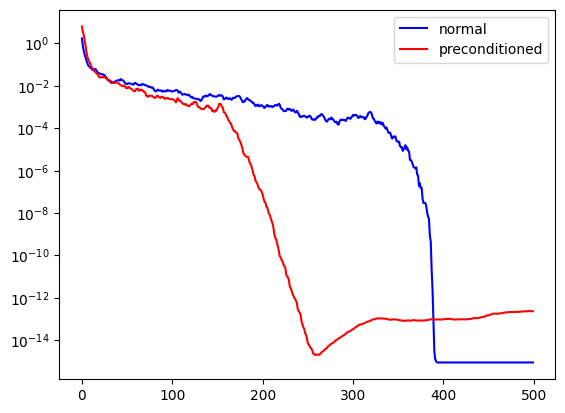

In [5]:
plt.plot(R_FroNorm, label='normal', color='b')
plt.plot(R_FroNorm_pre, label='preconditioned', color='r')
plt.yscale('log')
plt.legend()
plt.show()